In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('missing_swiggy.csv')

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  4150 non-null   object 
 1   ratings          3402 non-null   float64
 2   cuisines         4150 non-null   object 
 3   pricing          1187 non-null   float64
 4   address          4150 non-null   object 
 5   distance         3402 non-null   float64
 6   city             4150 non-null   object 
dtypes: float64(3), object(4)
memory usage: 227.1+ KB


In [10]:
df.isnull().mean()*100

restaurant_name     0.000000
ratings            18.024096
cuisines            0.000000
pricing            71.397590
address             0.000000
distance           18.024096
city                0.000000
dtype: float64

In [11]:
df['pricing'].value_counts(bins=5)

(75.0, 131.0]                 582
(18.718999999999998, 75.0]    466
(131.0, 187.0]                106
(187.0, 243.0]                 22
(243.0, 299.0]                 11
Name: count, dtype: int64

In [12]:
df['distance'].value_counts(bins=5)

(11.899000000000001, 32.0]    1346
(32.0, 52.0]                  1033
(52.0, 72.0]                   534
(72.0, 92.0]                   252
(92.0, 112.0]                  237
Name: count, dtype: int64

In [13]:
df['ratings'].value_counts(bins=5)

(3.8, 4.4]                   1802
(4.4, 5.0]                   1055
(3.2, 3.8]                    420
(2.6, 3.2]                     84
(1.9960000000000002, 2.6]      41
Name: count, dtype: int64

In [14]:
# here data is imbalanced  

In [15]:
df[['ratings','pricing','distance']].sample(10)

,ratings,pricing,distance
1584,5.0,NaN,32.0
3738,NaN,NaN,NaN
1186,4.0,95.0,28.0
1444,4.7,NaN,52.0
2942,4.3,75.0,102.0
3263,5.0,NaN,62.0
3335,NaN,NaN,NaN
1833,3.9,NaN,42.0
2211,NaN,NaN,NaN
808,NaN,NaN,NaN


In [16]:
# it lokks like pricing is mcar

In [17]:
dfc=df.copy()

In [18]:
dfc['pricing_impute']=dfc['pricing']
dfc

,restaurant_name,ratings,cuisines,pricing,address,distance,city,pricing_impute
0,kfc,4.4,"burgers, fast food, rolls & wraps",80.0,vallabh vidyanagar,38.0,anand,80.0
1,pizza hut,4.3,pizzas,189.0,hadgood,42.0,anand,189.0
2,subway,4.4,"healthy food, salads, fast food",NaN,mahadev nagar,32.0,anand,NaN
3,mcdonald's,4.4,"burgers, beverages, cafe, desserts",179.0,vallabh vidyanagar,32.0,anand,179.0
4,the belgian waffle co.,4.6,"waffle, desserts, ice cream, beverages",NaN,triveni arcade,38.0,anand,NaN
...,...,...,...,...,...,...,...,...
4145,ganga gayatri samosa,4.3,"fast food, street food, snacks",40.0,bus stand,38.0,nadiyad,40.0
4146,bombay chopati bhelpuri center,4.4,"chaat, snacks",40.0,nadiyad,38.0,nadiyad,40.0
4147,janta paubhaji pulav ice cream center,NaN,indian,NaN,nadiyad,NaN,nadiyad,NaN
4148,bao box,NaN,"chinese, indian, asian",NaN,nadiyad,NaN,nadiyad,NaN


In [19]:
dfc['pricing_impute'][dfc['pricing'].isnull()]=dfc['pricing'].dropna().sample(dfc['pricing'].isnull().sum(),replace=True).values

C:\Users\Dell\AppData\Local\Temp\ipykernel_7976\2606720793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['pricing_impute'][dfc['pricing'].isnull()]=dfc['pricing'].dropna().sample(dfc['pricing'].isnull().sum(),replace=True).values


In [20]:
columns_impute = ['ratings', 'pricing_impute', 'distance']

from sklearn.impute import KNNImputer
columns_impute = ['ratings', 'pricing_impute', 'distance']

def missing_values(dfc, columns_impute, n_neighbors=5):
    # Initialize an empty DataFrame to store the imputed results
    temp = pd.DataFrame()

    # Get the unique list of cities
    cities = dfc['city'].unique()

    # Iterate through each city
    for c in cities:
        # Filter the DataFrame for the current city
        df_city = dfc[dfc['city'] == c].copy()

        # Extract the columns to impute
        features = df_city[columns_impute]

        # Initialize the KNN Imputer
        impute = KNNImputer(n_neighbors=n_neighbors,weights='distance')

        # Perform imputation
        imputed = impute.fit_transform(features)

        # Replace the original columns with the imputed values
        df_city[columns_impute] = imputed

        # Append the imputed city data to the result DataFrame
        temp = pd.concat([temp, df_city], ignore_index=True)

    return temp



In [21]:
dfc=missing_values(dfc,columns_impute)

In [22]:
dfc

,restaurant_name,ratings,cuisines,pricing,address,distance,city,pricing_impute
0,kfc,4.40000,"burgers, fast food, rolls & wraps",80.0,vallabh vidyanagar,38.000000,anand,80.0
1,pizza hut,4.30000,pizzas,189.0,hadgood,42.000000,anand,189.0
2,subway,4.40000,"healthy food, salads, fast food",NaN,mahadev nagar,32.000000,anand,249.0
3,mcdonald's,4.40000,"burgers, beverages, cafe, desserts",179.0,vallabh vidyanagar,32.000000,anand,179.0
4,the belgian waffle co.,4.60000,"waffle, desserts, ice cream, beverages",NaN,triveni arcade,38.000000,anand,120.0
...,...,...,...,...,...,...,...,...
4145,ganga gayatri samosa,4.30000,"fast food, street food, snacks",40.0,bus stand,38.000000,nadiyad,40.0
4146,bombay chopati bhelpuri center,4.40000,"chaat, snacks",40.0,nadiyad,38.000000,nadiyad,40.0
4147,janta paubhaji pulav ice cream center,4.40098,indian,NaN,nadiyad,38.627451,nadiyad,19.0
4148,bao box,4.30000,"chinese, indian, asian",NaN,nadiyad,45.600000,nadiyad,100.0


In [23]:
# Summary statistics before imputation
print("Before imputation:")
print(dfc['pricing'].describe())

# Summary statistics after imputation
print("After imputation:")
print(dfc['pricing_impute'].describe())

print('======================================================================')
print("Before imputation:")
print(df['ratings'].describe())

# Summary statistics after imputation
print("After imputation:")
print(dfc['ratings'].describe())

print('========================================================================')

print("Before imputation:")
print(df['distance'].describe())

# Summary statistics after imputation
print("After imputation:")
print(dfc['distance'].describe())




Before imputation:
count    1187.000000
mean       89.542544
std        41.012775
min        19.000000
25%        50.000000
50%        80.000000
75%       120.000000
max       299.000000
Name: pricing, dtype: float64
After imputation:
count    4150.000000
mean       90.164337
std        41.046593
min        19.000000
25%        50.000000
50%        80.000000
75%       120.000000
max       299.000000
Name: pricing_impute, dtype: float64
Before imputation:
count    3402.000000
mean        4.228836
std         0.460201
min         2.000000
25%         4.025000
50%         4.300000
75%         4.500000
max         5.000000
Name: ratings, dtype: float64
After imputation:
count    4150.000000
mean        4.226591
std         0.425982
min         2.000000
25%         4.100000
50%         4.300000
75%         4.500000
max         5.000000
Name: ratings, dtype: float64
Before imputation:
count    3402.000000
mean       47.463257
std        22.958331
min        12.000000
25%        32.000000
50%

In [24]:
# Summary statistics before imputation
print("Before imputation:")
print(df['pricing'].var())

# Summary statistics after imputation
print("After imputation:")
print(dfc['pricing_impute'].var())

print('======================================================================')
print("Before imputation:")
print(df['ratings'].var())

# Summary statistics after imputation
print("After imputation:")
print(dfc['ratings'].var())

print('========================================================================')

print("Before imputation:")
print(df['distance'].var())

# Summary statistics after imputation
print("After imputation:")
print(dfc['distance'].var())




Before imputation:
1682.0477247187519
After imputation:
1684.8228300621445
Before imputation:
0.21178511922263857
After imputation:
0.18146060003951076
Before imputation:
527.0849476958074
After imputation:
514.8992508075474


In [25]:
# Compute correlation matrix before and after imputation
corr_before = df[['pricing', 'ratings', 'distance']].corr()
corr_after = dfc[['pricing_impute', 'ratings', 'distance']].corr()

# Display correlation matrices
print("Correlation Matrix Before Imputation:\n", corr_before)
print("\nCorrelation Matrix After Imputation:\n", corr_after)


corr_b= df[['pricing', 'ratings', 'distance']]
corr_a = dfc[['pricing_impute', 'ratings', 'distance']]


Correlation Matrix Before Imputation:
            pricing   ratings  distance
pricing   1.000000  0.029278  0.094949
ratings   0.029278  1.000000 -0.077014
distance  0.094949 -0.077014  1.000000

Correlation Matrix After Imputation:
                 pricing_impute   ratings  distance
pricing_impute        1.000000  0.015737  0.029104
ratings               0.015737  1.000000 -0.077724
distance              0.029104 -0.077724  1.000000


In [26]:

dfc

,restaurant_name,ratings,cuisines,pricing,address,distance,city,pricing_impute
0,kfc,4.40000,"burgers, fast food, rolls & wraps",80.0,vallabh vidyanagar,38.000000,anand,80.0
1,pizza hut,4.30000,pizzas,189.0,hadgood,42.000000,anand,189.0
2,subway,4.40000,"healthy food, salads, fast food",NaN,mahadev nagar,32.000000,anand,249.0
3,mcdonald's,4.40000,"burgers, beverages, cafe, desserts",179.0,vallabh vidyanagar,32.000000,anand,179.0
4,the belgian waffle co.,4.60000,"waffle, desserts, ice cream, beverages",NaN,triveni arcade,38.000000,anand,120.0
...,...,...,...,...,...,...,...,...
4145,ganga gayatri samosa,4.30000,"fast food, street food, snacks",40.0,bus stand,38.000000,nadiyad,40.0
4146,bombay chopati bhelpuri center,4.40000,"chaat, snacks",40.0,nadiyad,38.000000,nadiyad,40.0
4147,janta paubhaji pulav ice cream center,4.40098,indian,NaN,nadiyad,38.627451,nadiyad,19.0
4148,bao box,4.30000,"chinese, indian, asian",NaN,nadiyad,45.600000,nadiyad,100.0


<Axes: >

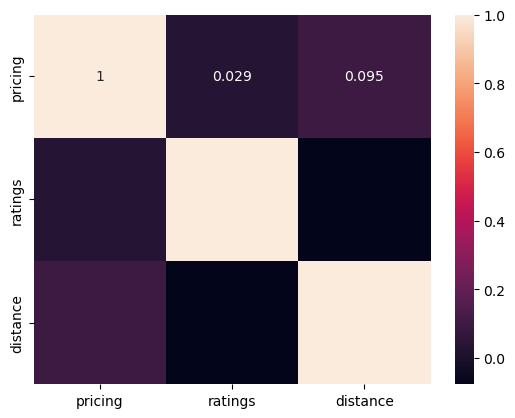

In [27]:
sns.heatmap(corr_b.corr(),annot=True)

<Axes: >

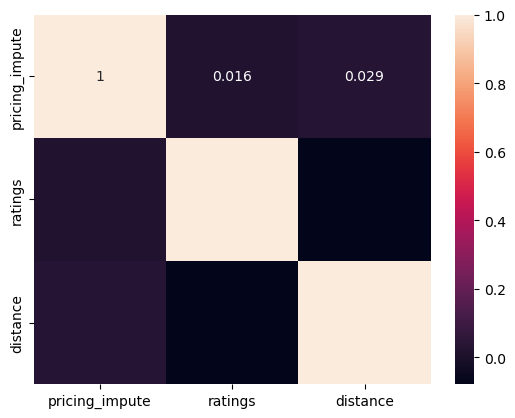

In [28]:
sns.heatmap(corr_a.corr(),annot=True)

In [22]:
dfc.isnull().sum()

restaurant_name       0
ratings               0
cuisines              0
pricing            2963
address               0
distance              0
city                  0
pricing_impute        0
dtype: int64

In [23]:
#dfc.to_excel("C:\\Users\\Dell\\OneDrive\\Desktop\\clean_swiggy_data.xlsx",index=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


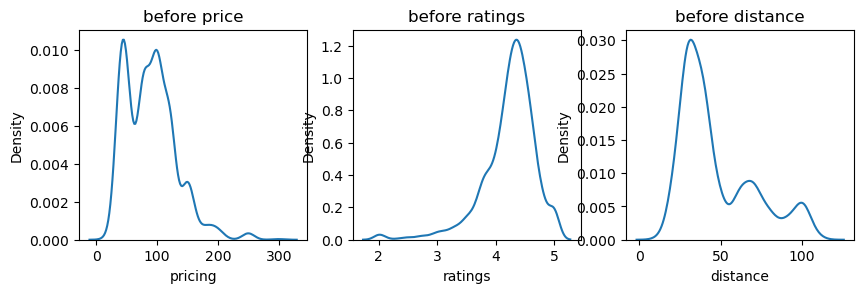

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


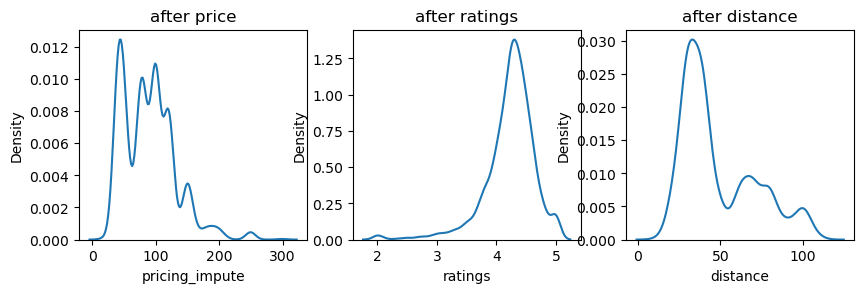

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(231)
sns.kdeplot(x='pricing',data=df)
plt.title('before price')

plt.subplot(232)
sns.kdeplot(x='ratings',data=df)
plt.title('before ratings')


plt.subplot(233)  
sns.kdeplot(x='distance',data=df)
plt.title('before distance')
plt.show()




plt.figure(figsize=(10,6))
plt.subplot(231)
sns.kdeplot(x='pricing_impute',data=dfc)
plt.title('after price')

plt.subplot(232)
sns.kdeplot(x='ratings',data=dfc)
plt.title('after ratings')


plt.subplot(233)  
sns.kdeplot(x='distance',data=dfc)
plt.title('after distance')
plt.show()